**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df_mur = pd.read_csv("World firearms murders and ownership - Sheet 1.csv")
df_sh = pd.read_csv("data-pvLFI.csv")
df_pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2.csv", skiprows = (0,2))
df_gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows = (0,2))

In [3]:
df_mur.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [4]:
df_mur = df_mur[['Country/Territory', 'Number of homicides by firearm', 'Average total all civilian firearms']]
df_mur.columns = ['Country Name', 'Number of homicides by firearm', 'Average total all civilian firearms']

In [5]:
df_sh.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
df_pop = df_pop[['Country Name', '2012']]
df_pop.columns = ['Country Name', 'pop']

In [7]:
df_gdp = df_gdp[['Country Name', '2012']]
df_gdp.columns = ['Country Name', 'gdp']
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [8]:
df_ = df_mur.merge(df_sh, right_on='Country', left_on='Country Name')
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,Australia,15.0,4
1,Austria,18.0,2500000.0,Austria,30.4,1
2,Canada,173.0,9950000.0,Canada,30.8,4
3,Denmark,15.0,650000.0,Denmark,12.0,0
4,Finland,24.0,2400000.0,Finland,45.3,2


In [9]:
df_popgdp = df_pop.merge(df_gdp, right_on='Country Name', left_on='Country Name')
df_popgdp.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [10]:
df_ = df_.merge(df_popgdp, right_on="Country Name", left_on="Country Name")
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567065e+11


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


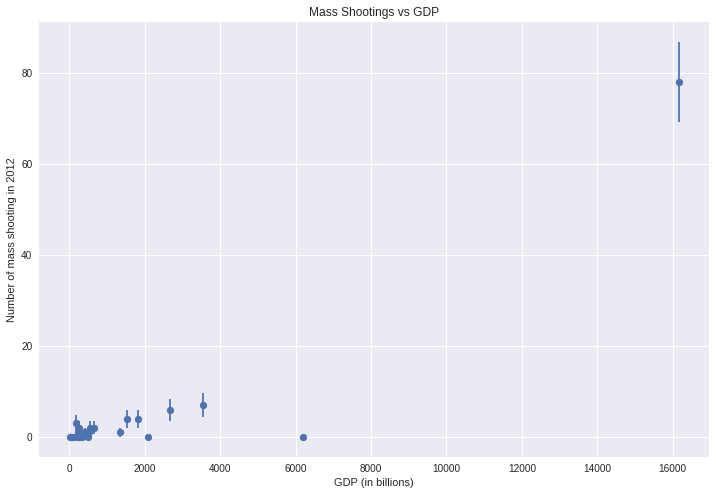

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [11]:
fig = pl.figure(figsize=(12,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting in 2012")
ax.set_ylim()
ax.set_title("Mass Shootings vs GDP")
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

### I can see that there is a major outlier. Based on the data, that outlier is the US with 78 mass shootings per year.

In [12]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_['gdppp'] = df_['gdp'] / df_['pop']
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdppp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538194e+12,0.000176,67677.634766
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074516e+11,0.000119,48333.572727
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567065e+11,0.000369,47415.559871


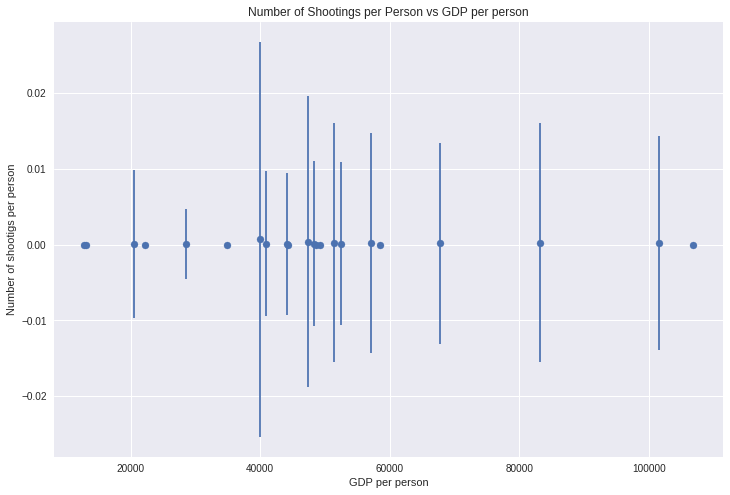

In [13]:
fig = pl.figure(figsize=(12,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdppp, df_['shootingspp'])
ax.errorbar(df_.gdppp, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of shootigs per person")
ax.set_ylim()
ax.set_title("Number of Shootings per Person vs GDP per person")
pl.show()

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [14]:
df_['firearmspp'] = df_["Average total all civilian firearms"] / df_['pop']

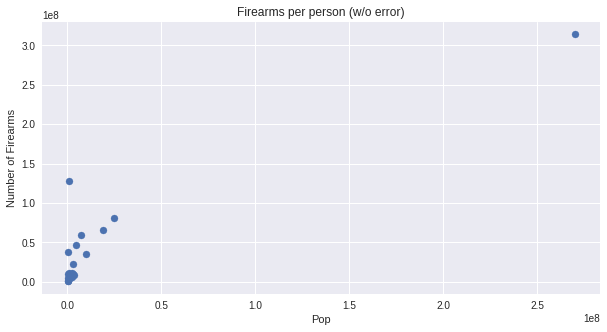

In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['pop'])
ax.set_xlabel("Pop")
ax.set_ylabel("Number of Firearms")
ax.set_ylim()
ax.set_title("Firearms per person (w/o error)")
pl.show()

There is a singular outlier in the upper right (United States). The rest are mostly clustered together. 

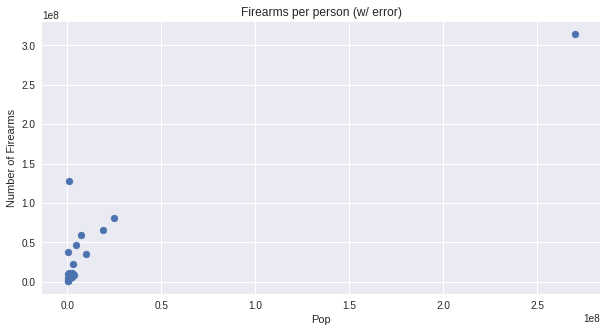

In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['pop'])
ax.errorbar(df_['Average total all civilian firearms'], df_['pop'], 
            yerr = np.sqrt(df_['pop'] * 1.0), fmt = '.')
ax.set_xlabel("Pop")
ax.set_ylabel("Number of Firearms")
ax.set_ylim()
ax.set_title("Firearms per person (w/ error)")
pl.show()

There is a singular outlier in the upper right (United States). The rest are mostly clustered together. 

## plot the average number of homicide by fire arms per person
first as a histogram

In [17]:
df_['homicidepp'] = df_["Number of homicides by firearm"] / df_['pop']
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdppp,firearmspp,homicidepp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538194e+12,0.000176,67677.634766,0.134194,0.000001
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074516e+11,0.000119,48333.572727,0.296560,0.000002
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870,0.286326,0.000005
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210,0.116246,0.000003
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567065e+11,0.000369,47415.559871,0.443298,0.000004


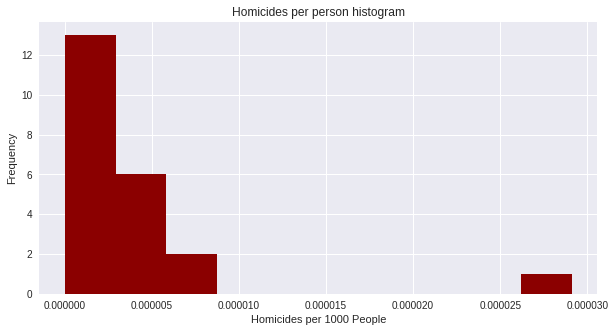

In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
ax.hist(df_['homicidepp'], color='darkred')
ax.set_xlabel("Homicides per 1000 People")
ax.set_ylabel("Frequency")
ax.set_title("Homicides per person histogram")

This shows (again) that most countries fall into one area, and that there is one outlier with a high number of homicides per capita.  

then against the country GDP, with statistical errors. are there  points that look like outliers?

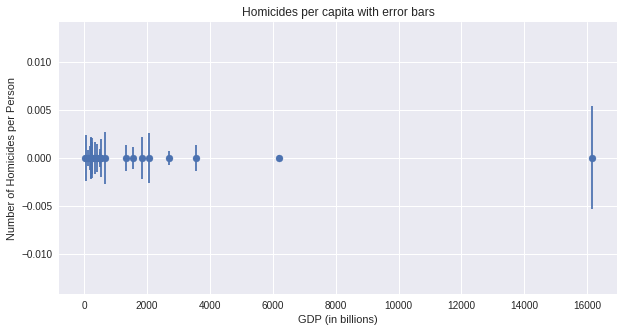

In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['homicidepp'])
ax.errorbar(df_.gdp / 1e9, df_['homicidepp'], 
            yerr = np.sqrt(df_['homicidepp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of Homicides per Person")
ax.set_title("Homicides per capita with error bars")
ax.set_ylim()
pl.show()

This shows (again) that most countries fall into one area, and that there is one outlier with a high number of homicides per capita.  

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


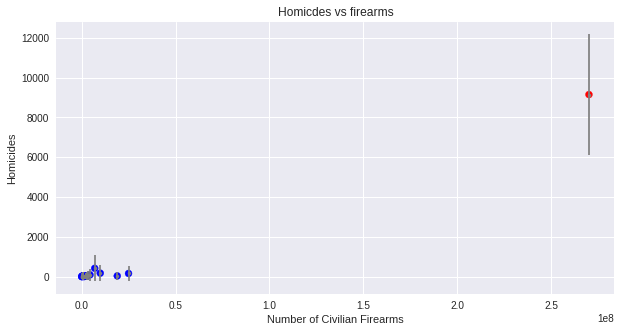

In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
                     color=(df_['Country Name'] == 'United States').map({0: 'b', 1: 'r'}))
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1000), fmt = '.', color='grey')
ax.set_xlabel("Number of Civilian Firearms")
ax.set_ylabel("Homicides")
ax.set_ylim()
ax.set_title("Homicdes vs firearms")
pl.show()

The US is in red. It is an outlier

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


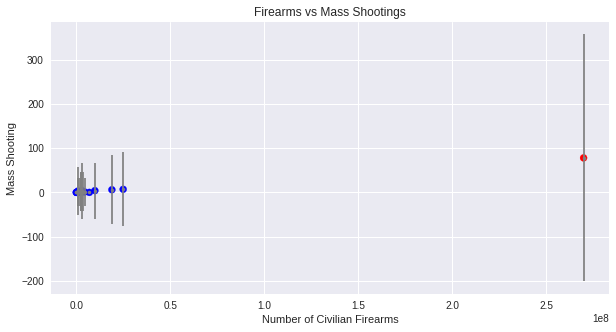

In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
                     color=(df_['Country Name'] == 'United States').map({0: 'b', 1: 'r'}))
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1000), fmt = '.', color='grey')
ax.set_xlabel("Number of Civilian Firearms")
ax.set_ylabel("Mass Shooting")
ax.set_ylim()
ax.set_title("Firearms vs Mass Shootings")
pl.show()

The US (red) in an outlier. 

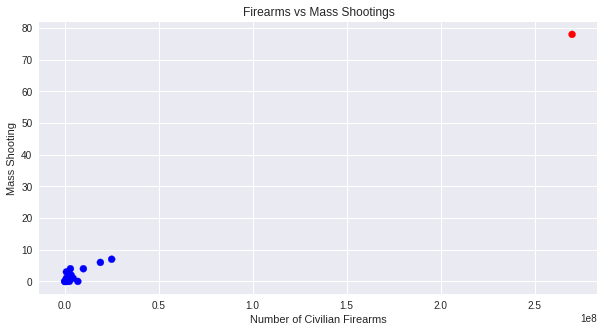

In [22]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
                     color=(df_['Country Name'] == 'United States').map({0: 'b', 1: 'r'}))
ax.set_xlabel("Number of Civilian Firearms")
ax.set_ylabel("Mass Shooting")
ax.set_ylim()
ax.set_title("Firearms vs Mass Shootings")
pl.show()

The US (red) is an outlier

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);

Code Adapated From Here: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/line_fit_and_residuals.ipynb

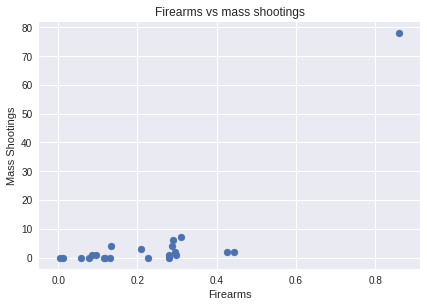

In [23]:
fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax.scatter(df_['firearmspp'], df_['Number of mass shootings'])
ax.set_title("Firearms vs mass shootings")
ax.set_xlabel("Firearms")
ax.set_ylabel("Mass Shootings")

In [24]:
##this function will fit a line woth statsmodels packages, 
##both with and without including the noise int he fir parameter (WLS and OLS respectively)
##also i can use the statsmodels.formula package passing it a formula, which i will need
##when i want to fit a curve, not a straight line, to the data
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

In [25]:
x = df_["firearmspp"]
y = df_['Number of mass shootings']

In [26]:
oreg = myregression(x, y) 

linear regression slope                                OLS Regression Results                               
Dep. Variable:     Number of mass shootings   R-squared:                       0.495
Model:                                  OLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     20.55
Date:                      Wed, 18 Oct 2017   Prob (F-statistic):           0.000181
Time:                              21:19:12   Log-Likelihood:                -85.809
No. Observations:                        22   AIC:                             173.6
Df Residuals:                            21   BIC:                             174.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------

In [27]:
wreg = myregression(x, y, method='W')

linear regression slope                                WLS Regression Results                               
Dep. Variable:     Number of mass shootings   R-squared:                       0.495
Model:                                  WLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     20.55
Date:                      Wed, 18 Oct 2017   Prob (F-statistic):           0.000181
Time:                              21:19:12   Log-Likelihood:                -85.809
No. Observations:                        22   AIC:                             173.6
Df Residuals:                            21   BIC:                             174.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------

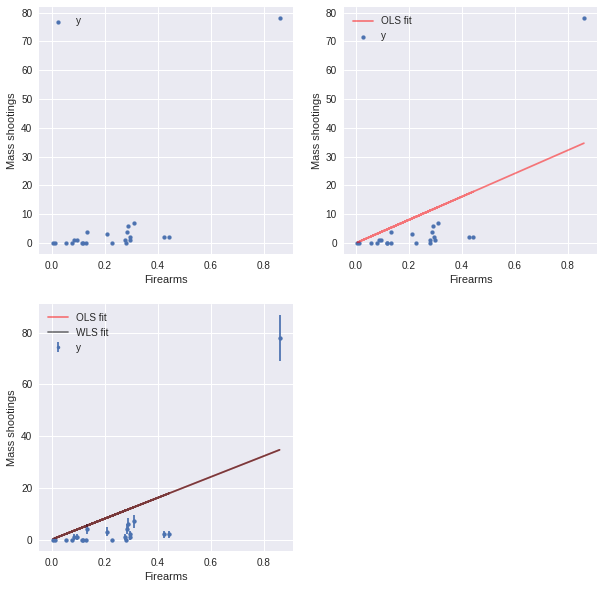

In [28]:
fig = pl.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax.scatter(x, y, label = "y", s = 15)
ax.set_xlabel("Firearms")
ax.set_ylabel("Mass shootings")
ax.legend()

ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "y", s = 15)
ax2.set_xlabel("Firearms")
ax2.set_ylabel("Mass shootings")
ax2.plot(x, oreg.predict(x), label = 'OLS fit', color = 'r', alpha=0.5)
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.scatter(x, y, label=None, s = 15)
ax3.set_xlabel("Firearms")
ax3.set_ylabel("Mass shootings")
ax3.plot(x, oreg.predict(x), label = 'OLS fit', color = 'r', alpha=0.5)
ax3.plot(x, wreg.predict(x), label = 'WLS fit', color = 'black', alpha=0.5)
ax3.errorbar(df_['firearmspp'], y, 
            yerr = np.sqrt(y), fmt = '.', label = 'y')
ax3.legend()

https://seaborn.pydata.org/generated/seaborn.regplot.html

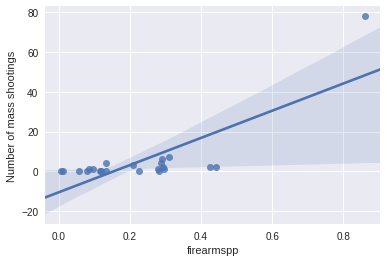

In [29]:
sns.regplot(x=df_['firearmspp'], y=df_['Number of mass shootings'], data=df_, ci=95)

http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html

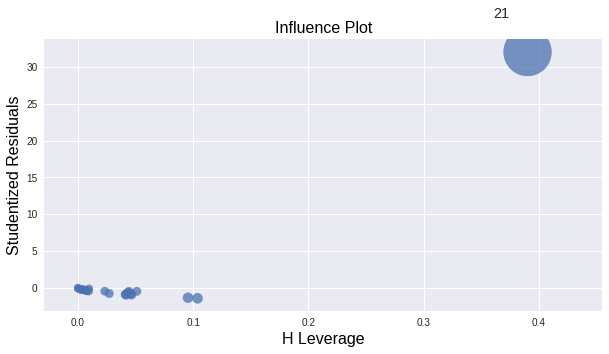

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(oreg, alpha = 0.05, criterion="cooks", ax=ax);

In [31]:
np.polyfit(x, y, 5)

array([  3.88241553e+03,  -5.82283803e+03,   2.81061652e+03,
        -5.22099231e+02,   4.16658382e+01,  -5.06327275e-01])